In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/spotify-2023.csv', encoding='latin-1')
data.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,141,C#,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,148,F,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,100,F,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,130,C#,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,170,D,Minor,81,56,48,21,0,8,33


In [3]:
# one-hot 'mode'
mode_onehot = pd.get_dummies(data['mode'],prefix='mode')
print(mode_onehot)

     mode_Major  mode_Minor
0          True       False
1          True       False
2          True       False
3          True       False
4         False        True
..          ...         ...
948        True       False
949        True       False
950        True       False
951        True       False
952       False        True

[953 rows x 2 columns]


In [4]:
data = pd.concat([data, mode_onehot], axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
data['key_encoded'] = label_encoder.fit_transform(data['key'].astype(str))

print("\nUpdated Data with Encoded Categorical Variables:")
print(data[['mode', *mode_onehot.columns, 'key', 'key_encoded']].head())


Updated Data with Encoded Categorical Variables:
    mode  mode_Major  mode_Minor key  key_encoded
0  Major        True       False   B            2
1  Major        True       False  C#            3
2  Major        True       False   F            7
3  Major        True       False   A            0
4  Minor       False        True   A            0


In [6]:
percentage_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']

for col in percentage_columns:
    data[col+'forML'] = data[col] / 100.

In [7]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,...,liveness_%,speechiness_%,key_encoded,danceability_%forML,valence_%forML,energy_%forML,acousticness_%forML,instrumentalness_%forML,liveness_%forML,speechiness_%forML
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,...,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,...,18.213012,10.131165,5.735572,0.669696,0.514313,0.642791,0.270577,0.015813,0.182130,0.101312
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,...,13.711223,9.912888,3.530682,0.146306,0.234806,0.165505,0.259961,0.084098,0.137112,0.099129
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,...,3.000000,2.000000,0.000000,0.230000,0.040000,0.090000,0.000000,0.000000,0.030000,0.020000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,...,10.000000,4.000000,3.000000,0.570000,0.320000,0.530000,0.060000,0.000000,0.100000,0.040000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,...,12.000000,6.000000,6.000000,0.690000,0.510000,0.660000,0.180000,0.000000,0.120000,0.060000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,...,24.000000,11.000000,9.000000,0.780000,0.700000,0.770000,0.430000,0.000000,0.240000,0.110000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,...,97.000000,64.000000,11.000000,0.960000,0.970000,0.970000,0.970000,0.910000,0.970000,0.640000


In [43]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data['in_deezer_playlists'] = pd.to_numeric(data['in_deezer_playlists'], errors='coerce')
data['in_deezer_playlists'].fillna(0, inplace=True)

# Remove the row with NaN value in 'streams' column
data = data.dropna(subset=['streams'])

In [44]:
cols_for_STREAM = ['artist_count', 'released_year', 'released_month', 'released_day',
    'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
    'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%forML',
    'valence_%forML', 'energy_%forML', 'acousticness_%forML', 'instrumentalness_%forML',
    'liveness_%forML', 'speechiness_%forML', 'key_encoded']

In [42]:
data['streams'].isna().sum()

1

In [76]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor,LazyClassifier

x_STREAM = data[cols_for_STREAM]
y_STREAM = data['streams']
x_train, x_temp, y_train, y_temp = train_test_split(x_STREAM, y_STREAM, test_size=0.2,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp, y_temp,test_size=0.5,random_state=42)
# Use LazyRegressor to find the best regression model
reg = LazyRegressor(verbose=1, ignore_warnings=False, custom_metric=None)
# cls = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(x_train, x_val, y_train, y_val)
# models, predictions = cls.fit(x_train, x_val, y_train, y_val)
# Print the list of models and their performance
print(models)

 17%|████████████████▎                                                                                 | 7/42 [00:00<00:01, 29.86it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6187919244343829, 'Adjusted R-Squared': 0.5222192119577599, 'RMSE': 297915565.6967261, 'Time taken': 0.09574198722839355}
{'Model': 'BaggingRegressor', 'R-Squared': 0.7721287565033074, 'Adjusted R-Squared': 0.7144013748174786, 'RMSE': 230333395.65331948, 'Time taken': 0.045213937759399414}
{'Model': 'BayesianRidge', 'R-Squared': -0.037989501778119994, 'Adjusted R-Squared': -0.30094684222857704, 'RMSE': 491596327.2188173, 'Time taken': 0.019002914428710938}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6523743118401972, 'Adjusted R-Squared': 0.5643091375063805, 'RMSE': 284490703.88927704, 'Time taken': 0.011899948120117188}
{'Model': 'DummyRegressor', 'R-Squared': -0.03798950177812732, 'Adjusted R-Squared': -0.30094684222858636, 'RMSE': 491596327.2188191, 'Time taken': 0.008431196212768555}
{'Model': 'ElasticNet', 'R-Squared': 0.6229470302827336, 'Adjusted R-Squared': 0.527426944621026, 'RMSE': 296287501.5951413, 'Time taken': 0.04155111

 26%|█████████████████████████▍                                                                       | 11/42 [00:00<00:02, 11.49it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.5807366372072456, 'Adjusted R-Squared': -0.9811899186330812, 'RMSE': 606655177.7344803, 'Time taken': 0.28278398513793945}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.7490258268033233, 'Adjusted R-Squared': 0.6854457029268319, 'RMSE': 241727836.52196854, 'Time taken': 0.25133180618286133}


 33%|████████████████████████████████▎                                                                | 14/42 [00:02<00:05,  4.82it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.7762864119928704, 'Adjusted R-Squared': 0.7196123030310642, 'RMSE': 228222432.8529665, 'Time taken': 1.0777268409729004}
{'Model': 'HuberRegressor', 'R-Squared': 0.007886686221918016, 'Adjusted R-Squared': -0.2434486866018628, 'RMSE': 480609983.4031869, 'Time taken': 0.0073430538177490234}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5851356364402556, 'Adjusted R-Squared': 0.4800366643384536, 'RMSE': 310788696.1640419, 'Time taken': 0.07228207588195801}


 52%|██████████████████████████████████████████████████▊                                              | 22/42 [00:02<00:02,  9.34it/s]

{'Model': 'KernelRidge', 'R-Squared': -0.3826684232631574, 'Adjusted R-Squared': -0.7329444238231575, 'RMSE': 567376274.5987471, 'Time taken': 0.2838571071624756}
{'Model': 'Lars', 'R-Squared': 0.6547995363357151, 'Adjusted R-Squared': 0.5673487522074295, 'RMSE': 283496586.6015689, 'Time taken': 0.013181924819946289}
{'Model': 'LarsCV', 'R-Squared': 0.6459985762980758, 'Adjusted R-Squared': 0.5563182156269216, 'RMSE': 287087744.5400502, 'Time taken': 0.010406017303466797}
{'Model': 'Lasso', 'R-Squared': 0.6547995352031469, 'Adjusted R-Squared': 0.5673487507879441, 'RMSE': 283496587.06663084, 'Time taken': 0.013494014739990234}
{'Model': 'LassoCV', 'R-Squared': 0.6459864841539504, 'Adjusted R-Squared': 0.5563030601396178, 'RMSE': 287092647.7360635, 'Time taken': 0.04956316947937012}
{'Model': 'LassoLars', 'R-Squared': 0.6547995351906017, 'Adjusted R-Squared': 0.5673487507722208, 'RMSE': 283496587.07178223, 'Time taken': 0.004265308380126953}
{'Model': 'LassoLarsCV', 'R-Squared': 0.64599

 71%|█████████████████████████████████████████████████████████████████████▎                           | 30/42 [00:03<00:01, 11.89it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.7967228479370163, 'Adjusted R-Squared': -1.2518926360810605, 'RMSE': 646774210.159143, 'Time taken': 0.4137248992919922}
{'Model': 'NuSVR', 'R-Squared': -0.00126640093756758, 'Adjusted R-Squared': -0.25492055584175155, 'RMSE': 482821910.84419376, 'Time taken': 0.027853965759277344}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5030616965073269, 'Adjusted R-Squared': 0.3771706596225164, 'RMSE': 340144447.1580248, 'Time taken': 0.0135040283203125}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6054152878782062, 'Adjusted R-Squared': 0.5054538274740183, 'RMSE': 303097445.69347805, 'Time taken': 0.018355131149291992}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.7939184457343018, 'Adjusted R-Squared': -1.2483777853203253, 'RMSE': 646269256.5585611, 'Time taken': 0.06507635116577148}
{'Model': 'PoissonRegressor', 'R-Squared': 0.5912628800699347, 'Adjusted R-Squared': 0.48771614302098476, 'RMSE': 308485097.8885831, 'Time ta

 76%|█████████████████████████████████████████████████████████████████████████▉                       | 32/42 [00:33<00:29,  2.91s/it]

{'Model': 'QuantileRegressor', 'R-Squared': -0.07984539078991926, 'Adjusted R-Squared': -0.35340622312336545, 'RMSE': 501409939.13516986, 'Time taken': 30.7011661529541}
{'Model': 'RANSACRegressor', 'R-Squared': 0.2978203747565594, 'Adjusted R-Squared': 0.11993486969488776, 'RMSE': 404330274.6749463, 'Time taken': 0.056715965270996094}


 95%|████████████████████████████████████████████████████████████████████████████████████████████▍    | 40/42 [00:34<00:02,  1.25s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7912756945782002, 'Adjusted R-Squared': 0.7383988705380109, 'RMSE': 220444192.11642084, 'Time taken': 0.4952530860900879}
{'Model': 'Ridge', 'R-Squared': 0.6548282680270587, 'Adjusted R-Squared': 0.5673847625939136, 'RMSE': 283484788.3759353, 'Time taken': 0.004498720169067383}
{'Model': 'RidgeCV', 'R-Squared': 0.6550053988868317, 'Adjusted R-Squared': 0.567606766604829, 'RMSE': 283412041.47441775, 'Time taken': 0.022064208984375}
{'Model': 'SGDRegressor', 'R-Squared': 0.6569109777734976, 'Adjusted R-Squared': 0.5699950921427837, 'RMSE': 282628243.94713336, 'Time taken': 0.004272937774658203}
{'Model': 'SVR', 'R-Squared': -0.07983950320770594, 'Adjusted R-Squared': -0.35339884402032484, 'RMSE': 501408572.22825515, 'Time taken': 0.032160043716430664}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6547995363357157, 'Adjusted R-Squared': 0.5673487522074303, 'RMSE': 283496586.6015686, 'Time taken': 0.013219118118286133}
{'Model': 'T

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [00:35<00:00,  1.19it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [23]:
data['in_deezer_playlists'].isna().sum()

0

In [11]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [74]:
models.keys()

Index(['Adjusted R-Squared', 'R-Squared', 'RMSE', 'Time Taken'], dtype='object')

In [64]:

for model_name, model_pred in predictions.items():
    print(model_name)
#     plt.figure(figsize=(6, 6))
#     plt.scatter(y_val, model_pred, alpha=0.5)  # Plot actual vs predicted
#     plt.title(f'Actual vs Predictions: {model_name}')
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.grid(True)
#     plt.show()

Adjusted R-Squared
R-Squared
RMSE
Time Taken


In [78]:
predictions.head()

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
XGBRegressor,0.75,0.80,214405798.74,0.44
RandomForestRegressor,0.74,0.79,220444192.12,0.50
HistGradientBoostingRegressor,0.72,0.78,228222432.85,1.08
BaggingRegressor,0.71,0.77,230333395.65,0.05
ExtraTreesRegressor,0.71,0.77,230671170.75,0.28


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
# from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

etr = RandomForestRegressor(n_estimators=1000,random_state=42).fit(x_train,y_train)
# rsr = RANSACRegressor(max_trials=500,random_state=42).fit(x_train,y_train)

y_pred = etr.predict(x_val)

mse = mean_squared_error(y_val,y_pred)
mae = mean_absolute_error(y_val,y_pred)
r2 = r2_score(y_val,y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")
print(etr.get_params())

Mean Squared Error (MSE): 5.0477311654802904e+16
Mean Absolute Error (MAE): 147379458.32612634
R^2 Score: 0.7831936894699094
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [84]:
y_test_pred = etr.predict(x_test)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"R^2 Score: {r2_test}")

Test Set Evaluation:
Mean Squared Error (MSE): 4.4272736686687656e+16
Mean Absolute Error (MAE): 134394084.7955
R^2 Score: 0.8252129404045287


Feature Importances:
                    Feature  Importance
4      in_spotify_playlists        0.73
6        in_apple_playlists        0.07
1             released_year        0.05
5         in_spotify_charts        0.02
8       in_deezer_playlists        0.02
12           valence_%forML        0.01
7           in_apple_charts        0.01
13            energy_%forML        0.01
10                      bpm        0.01
16          liveness_%forML        0.01
14      acousticness_%forML        0.01
11      danceability_%forML        0.01
3              released_day        0.01
18              key_encoded        0.01
2            released_month        0.01
9          in_deezer_charts        0.01
17       speechiness_%forML        0.01
0              artist_count        0.00
15  instrumentalness_%forML        0.00


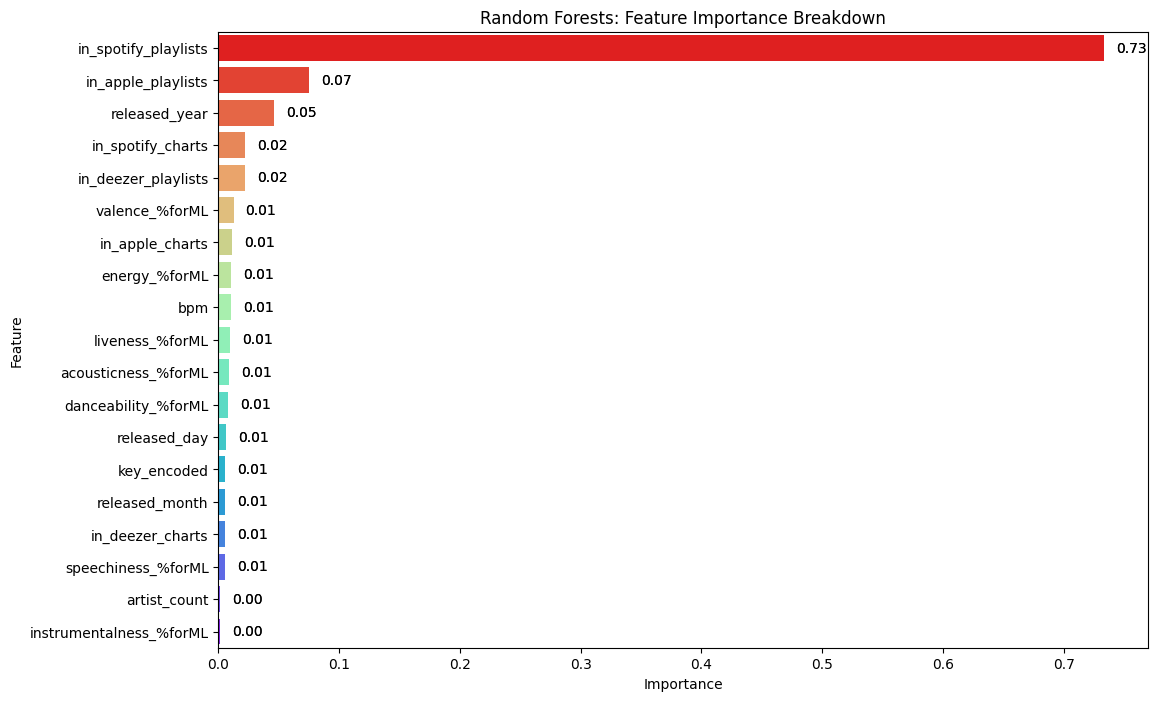

In [93]:
feature_importances = etr.feature_importances_
features_df = pd.DataFrame({
    'Feature': cols_for_STREAM,
    'Importance': feature_importances
})

print("Feature Importances:")
print(features_df.sort_values(by='Importance', ascending=False))

feature_importances = etr.feature_importances_
features = cols_for_STREAM

# Create a DataFrame for the importances and plot
df_importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))

# Generate a list of rainbow colors based on the number of bars
num_bars = df_importances.shape[0]
colors = plt.cm.rainbow(np.linspace(0, 1, num_bars))

ax = sns.barplot(x='Importance', y='Feature', data=df_importances, palette=colors)

# Create the barplot with rainbow colors
sns.barplot(x='Importance', y='Feature', data=df_importances, palette=colors[::-1])

plt.title('Random Forests: Feature Importance Breakdown')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01,
            p.get_y() + p.get_height() / 2,
            '{:1.2f}'.format(width),
            ha = 'left',
            va = 'center')

plt.show()

In [97]:
param_grid = {
    'n_estimators': [100, 200, 500,1000],
    'max_features': ['sqrt','log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [1, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

In [98]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=ExtraTreesRegressor(), param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

y_val_pred_grid = grid_search.best_estimator_.predict(x_val)

mse = mean_squared_error(y_val, y_val_pred_grid)
mae = mean_absolute_error(y_val, y_val_pred_grid)
r2 = r2_score(y_val, y_val_pred_grid)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Best parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
Mean Squared Error (MSE): 6.020470895884818e+16
Mean Absolute Error (MAE): 175143311.8902779
R^2 Score: 0.7414133122784127
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=1, n_estimators=200; total time=   0.0s
[CV] END max_depth=None

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=8, n_estimators=1000; total time=   0.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=200; total time=   0.1s
[CV] END max_depth=None

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=1, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time=   0.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   0.1s
[CV] END max_depth=None